# Imports

In [ ]:
import networkx.algorithms.community as community
import networkx as nx
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import pylab

# Opening files

In [30]:
# Text file
def open_file(file_name):
    """This funciton opens a file and splits it into a list"""
    with open(file_name, "r") as file_reader:
        file_list = []
        for line in file_reader:
            line = line.strip("\n")
            file_list.append(line)
        return file_list

# Text file, create a graph
def graphtext_file(file_name):
    graph = nx.DiGraph()
    with open(file_name) as file_reader:
        for line in file_reader:
            all_nodes = line.split(',')
            to_node = all_nodes[0]
            from_nodes = all_nodes[1:]
            to_node = to_node.strip().casefold()
            for from_node in from_nodes:
                from_node = from_node.strip().casefold()
                graph.add_edge(from_node, to_node)
    return graph
                
# JSON file
def read_json_file(filename, directed):
    import json
    from networkx.readwrite import json_graph
    with open(filename) as file_reader:
        graph = json.load(file_reader)
    graph = json_graph.node_link_graph(graph, directed)
    return graph

# # gml file
# graph = nx.read_gml("file.gml")

# # graphml file
# graph = nx.read_graphml('les_miserables.graphml')
# nx.draw(graph)

# # Pajek 
# graph = nx.read_pajek("test.net")

# # Adjlist This format does not store graph or node data.
# # https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.adjlist.read_adjlist.html#networkx.readwrite.adjlist.read_adjlist
# graph = nx.read_adjlist("test.net")

# Graph

Network graphs are collections of nodes connected by edges:

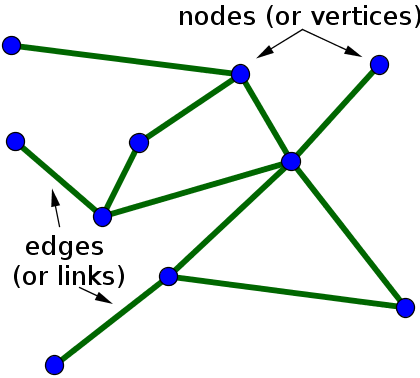

There are several ways to make a graph in python:
  - Matrices
  - Edge lists
  - Dictionairy based

### NetworkX

In [2]:
import networkx as nx

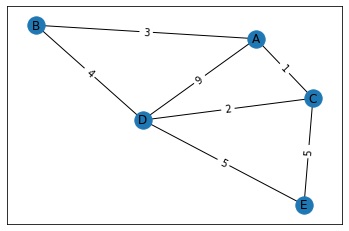

In [3]:
# Creates a graph
graph = nx.Graph()

# Adds nodes to the graph
# Not neccessary and the letters will not be visible on the nodes
# graph.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Adds edges to the graph
graph.add_edges_from([
    ('A', 'C', {'d': 1}), # d is the weight/length of the graph
    ('A', 'B', {'d': 3}), # d can be used as a key to iterate through the diferent weights
    ('C', 'D', {'d': 2}),
    ('C', 'E', {'d': 5}),
    ('B', 'D', {'d': 4}),
    ('A', 'D', {'d': 9}),
    ('D', 'E', {'d': 5})
    ])


for edge in graph.edges:
    distance = graph.edges[edge]['d']
    graph.edges[edge]['w'] = 1/distance

# Drawing the graph
pos = nx.spring_layout(graph, weight='w', iterations=250)
nx.draw_networkx(graph, pos=pos)

# Adding the distances in the graph
nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=nx.get_edge_attributes(graph, 'd'));

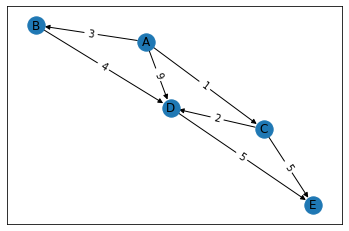

In [6]:
# Creates a directed graph
directed_graph = nx.DiGraph()

# Add nodes
directed_graph.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add edges
directed_graph.add_edges_from([
    ('A', 'C', {'d': 1}),
    ('A', 'B', {'d': 3}),
    ('C', 'D', {'d': 2}),
    ('C', 'E', {'d': 5}),
    ('B', 'D', {'d': 4}),
    ('A', 'D', {'d': 9}),
    ('D', 'E', {'d': 5})
    ])

# Drawing the graph
pos = nx.spring_layout(directed_graph, weight='w', iterations=250)
nx.draw_networkx(directed_graph, pos=pos)

# Adding the distances in the graph
nx.draw_networkx_edge_labels(directed_graph, pos=pos, edge_labels=nx.get_edge_attributes(graph, 'd'));

In [ ]:
# Making a graph bigger:
import pylab

# before nx.draw
# pylab.figure(1,figsize=(10,10))
# pylab.figure(1,figsize=(12,12))

# after nx.draw
# pylab.show()

# Histogram

In [ ]:
# plt.hist(x=data
#          bins=np.arange(0,10, 1), 
#          color='blue',alpha=1, rwidth=1, label='experimental', align='left')
# plt.grid(axis='y', alpha=0.5)
# plt.xlabel('x_label')
# plt.ylabel('y_label')
# plt.title('Title')
# plt.legend(loc='best')
# plt.show()

# Check graph type

__Euler__ nx.is_eulerian(graph)

__Bipartite__ nx.is_bipartite(G)[link](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.bipartite.basic.is_bipartite.html)

__planar__ nx.is_planar(G)

__DAG__ nx.is_directed_acyclic_graph(G)

__connectivity__: nx.is_weakly_connected(G), nx.is_strongly_connected(G), nx.is_connected(G) [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_connected.html#networkx.algorithms.components.is_connected)



# Paths

__nx.shortest_path_length(graph, end, start)__: 
Returns the shortest path in a graph [Link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html)

__nx.single_source_dijkstra(node1, node2)__:
gets the data from the shortest path between two node (incl the weight) [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html)

__hamiltonian_path(G)__: Returns a Hamiltonian path in the given tournament graph.[link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.tournament.hamiltonian_path.html#hamiltonian-path)



# Edges and nodes

__graph.get_edge_data(node1, node2)__:
Get the edges between two nodes [link](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.get_edge_data.html)

__graph.neighbors(node)__:
gets the neighbors of the nodes [link](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)

__degree(G, nbunch=None, weight=None)__: gets the degree of the graph, or of a specific node[link](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html#degree)




# Communities and clusters

__general documentation__ [link](https://networkx.org/documentation/stable/reference/algorithms/community.html)

__communities = community.louvain_communities(graph)__:
A way to find communities in a graph [Link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities)

__centrality = nx.degree_centrality(graph)__: dictionairy of the centralities

__most_central_node = sorted(centrality, key=centrality.get, reverse=True)[0]__:
Getting the most central node using the centrality [link](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html)



# Embedding

spring lay out
kamada kawai
circular
spiral

# NetworkX functions

#### graph = nx.caveman_graph(l, k)
caveman graph

#### pos = nx.spring_layout(graph)
#### nx.draw(graph, pos = pos) 
Assigning the graph with the layout. Then drawing the graph with layout [link](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)


# Set

In [1]:
# data1 = set(data1)
# data2 = set(data2)


# intersect = data1.intersection(data2)

# Create random edges

In [ ]:
# while True:
#     node1 = random.choice(list(graph.nodes))
#     node2 = random.choice(list(graph.nodes))
#     if node1 != node2:
#         graph.add_edge(node1,node2)
#     if some_condition is true:
#         break

# Jargon

### 𝑁(𝑣)=𝑤∈𝑉(𝐺)|𝑣≠𝑤,∃𝑒∈𝐸(𝐺):𝑒=(𝑤,𝑣)

It means that 𝑁(𝑣) is the set of all vertices 𝑤 in the graph 𝐺 that are adjacent to 𝑣 via an edge.
- v is a vertex.
- The neighbor set N(v) is a set of vertices adjacent to v.
- V(g) is the set of vertices in graph G.
- 𝑤 ∈ 𝑉(𝐺) means that 𝑤 is a vertex in the graph 𝐺
- |𝑣≠𝑤, ∃𝑒∈𝐸(𝐺): 𝑒=(𝑤,𝑣)| is the number of vertices w that are adjacent to v via an edge e in the graph G.

### Graph
Network of connected nodes and edges

### Node
A point in a graph

### Edge
Connects nodes

### Degree
Number of edges that are connected to a particular vertex or node in a graph

### Euler trial
A path that visits every edge once

### Hamilton path
A path that visits every vertex once

### Edge weight
A numerical value assigned to each edge of a graph. For example: distance in meters

### Complete graph
A graph were each node is connected with all the other nodes with unique edges

### Undirected graph
Network of connected nodes where edges are bidirectional

### DiGraph
Network of connected nodes where edges have a direction

### Self loops
An edge that connects a vertex to itself. There can be an edge (u,u)

### Multigraph
A graph in which multiple edges between some vertices are permitted, these edges that have the same endpoints. Two vertices may be connected by more then two edges.

### Hypergraph
A graph where an edge can join any number of vertices

### Edge lists
information of a graph stored in a list. Could be in tuples to include information about the node

### Dictionairy based graphs
Representing a graph using a dictionairy. Keys = nodes , valeus = nodes connected to the key node

### Walk
Sequence of connected nodes

### Trial
Sequence of connected nodes with unique edges

### Path
Sequence of connected nodes with unique edges and nodes

### Closed walk, tour, cycle
Start is the same as the end node

### Vertex coloring
assigning colors to nodes so that
2 neighboring nodes not have the same color.

### Chromatic number
Minumum amount of colors needed for vertex coloring.
PLanar graph: max 4
Biparte graph: max 2
Complete graph with n nodes: n
Graph with clique of n nodes: n
Graph with cycle of size n: 2 when n is even, 3 when n is odd


# Dijkstra

Dijkstra's algoritm is a way to find the shortest path between two nodes in a graph. It works by starting at the initial node and visiting its neighbors, recording the distance to each neighbor. Then, it moves to the neighbor with the shortest distance and repeats the process until it reaches the destination node.

To keep track of the distances, Dijkstra's algorithm uses a priority queue, which is a data structure that allows the nodes to be sorted by their distance from the initial node. As it visits each neighbor, it updates the distance if a shorter path is found.

Once the destination node is reached, the shortest path can be traced back by following the nodes with the shortest path as long as there are no negative edge weights in the graph.

In [7]:
# How to do dijkstra's algoritm with networkX

def dijkstra(graph, start, end, weight):
    
    dijkstra = nx.dijkstra_path(graph, start, end, weight=weight)
    return dijkstra 

print(dijkstra(graph, 'A', 'E', 'd')) 

['A', 'C', 'E']


In [ ]:
# Create a list of “distances” equal to the number of nodes and initialize each value to infinity

# def dijkstra_algoritm(graph)
#     distances_list = [np.inf] * len(graph)
#     distances_list[0] = 0
    
#     visited nodes = 

#### Step 1: Mark all nodes as not visited by creating two lists


In [8]:
visited_nodes = []
unvisited_nodes = graph.nodes

#### Step 2: Assign to all nodes a tentative distance value

In [21]:
import numpy as np

# Creating a dictionairy to track the shortest paths
tentative_distance_value = {node : [np.inf, None] for node in graph.nodes}
tentative_distance_value["A"] = [0, None]

print(tentative_distance_value)

{'A': [0, None], 'C': [inf, None], 'B': [inf, None], 'D': [inf, None], 'E': [inf, None]}


#### Step 3: Calculate the distance to all unvisited nodes and update the shortest distance

In [29]:
# Fill in all the first nodes
for key, value in graph["A"].items():
    tentative_distance_value[key] = ["A", value["d"]]

tentative_distance_value

{'A': [0, None], 'C': ['A', 1], 'B': ['A', 3], 'D': ['A', 9], 'E': [inf, None]}

# Garbage

In [12]:
# def shortest_path(start, end, graph, path):
#     new_paths = []
#     shortest_distance = np.inf
    
#     # Looping through all the neighbor nodes
#     for neighbor, info in graph[path[-2]].items():
#         # Only the unvisited nodes
#         if neighbor not in path:
#             distance = path[-1] + info["d"]
#             path.extend([neighbor, distance])
#             if new_shortest > distance:
#                 new_shortest = distance
#         elif neighbor in path:
#             pass
#         else:
#             raise Exception("Something wrong")
#         new_paths.append(path)
    
#     if len(new_paths) >= 1:
#         return new_paths
    
    

# def path(graph, start, end):
#     paths = []
#     shortest = np.inf
#     # Starting to fill in the known info
#     for neighbor, info in graph[start].items():
#         paths.append([start, neighbor, info["d"]])
    
#     for path in paths:
#         new_paths = shortest_path(start, end, graph, path)
#         paths.extend(new_paths)
    
#     print(paths)
        
        
        
            
    

# path(graph, "A", "E")
